# THE Rankings

In [1]:
import pandas as pd


In [2]:
path = '../data/raw/THE By Subject 2011-2020.xlsx'


## Preprocesamiento

In [3]:
df_business = pd.read_excel(path, sheet_name='Business & Economics')
df_computer = pd.read_excel(path, sheet_name='Computer Science')
df_engineer = pd.read_excel(path, sheet_name='Engineering & Technology')
df_medicine = pd.read_excel(path, sheet_name='Clinical, pre-clinical and heal')
df = pd.concat([df_business, df_computer, df_engineer, df_medicine])


In [4]:
df.isna().sum()


Subject                         0
Year                            0
THE Rank                        0
Name                            0
Location                        0
No. Of FTE students           707
No. of students per staff     707
International students        817
Female                       1180
Male                         1180
Overall                         0
Overall Fixed                   0
Citations                       0
Industry income                72
International outlook           3
Research                        0
Teaching                        0
Unnamed: 17                  8844
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 17', 'No. Of FTE students', 'No. of students per staff',
        'International students', 'Female', 'Male'], inplace=True)


In [6]:
df


,Subject,Year,THE Rank,Name,Location,Overall,Overall Fixed,Citations,Industry income,International outlook,Research,Teaching
0,Business & Economics,2017,1,Massachusetts Institute of Technology,United States,91.4,91.4,99.7,98.9,67.7,91.8,89.3
1,Business & Economics,2017,2,Queen Mary University of London,United States,89.4,89.4,92.2,69.6,68.1,91.3,91.7
2,Business & Economics,2017,3,University of Oxford,United Kingdom,88.9,88.9,77.6,92.0,88.8,96.9,89.0
3,Business & Economics,2017,4,University of Chicago,United States,87.4,87.4,98.2,32.6,60.1,87.5,89.3
4,Business & Economics,2017,5,Harvard University,United States,86.5,86.5,97.5,32.6,52.4,89.1,87.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2545,"Clinical, pre-clinical and health",2020,601+,Yangzhou University,China,17.1–25.9,21.5,42.7,41.7,38.2,11.4,10.8
2546,"Clinical, pre-clinical and health",2020,601+,Yeditepe University,Turkey,17.1–25.9,21.5,34.2,52.7,21.5,9.1,11.2
2547,"Clinical, pre-clinical and health",2020,601+,Yeungnam University,South Korea,17.1–25.9,21.5,39.4,43.3,20.8,11.6,15.1
2548,"Clinical, pre-clinical and health",2020,601+,Zagazig University,Egypt,17.1–25.9,21.5,34.1,41.6,37.4,10.0,13.4


In [7]:
df.dtypes


Subject                   object
Year                       int64
THE Rank                  object
Name                      object
Location                  object
Overall                   object
Overall Fixed            float64
Citations                float64
Industry income           object
International outlook     object
Research                 float64
Teaching                 float64
dtype: object

In [8]:
df['Industry income'] = pd.to_numeric(df['Industry income'], errors='coerce')
df['International outlook'] = pd.to_numeric(
    df['International outlook'], errors='coerce')

df['Industry income'].fillna(method='bfill', inplace=True)
df['International outlook'].fillna(method='bfill', inplace=True)


## Creacion del modelo para elegir categorias importantes

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [10]:
columnas = ['Citations', 'Industry income',
            'International outlook', 'Research', 'Teaching']


In [11]:
X = df[columnas]
Y = df['Overall Fixed']


In [12]:
model = LinearRegression()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


In [14]:
model.fit(X_train, y_train)


LinearRegression()

In [15]:
scores = cross_val_score(model, X, Y, cv=10)


In [16]:
print(scores.mean())


0.9859140798806116


In [17]:
coefs = pd.DataFrame(data=model.coef_, index=columnas)


In [18]:
coefs.sort_values(by=0, ascending=False)


,0
Teaching,0.305799
Research,0.298791
Citations,0.282424
International outlook,0.079780
Industry income,0.038220


Haremos un plot de __Teaching, Research, Citations y Overall Fixed__

## Creacion de imagenes de analisis

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
universities = ['Monterrey Institute of Technology',
                'University of São Paulo']


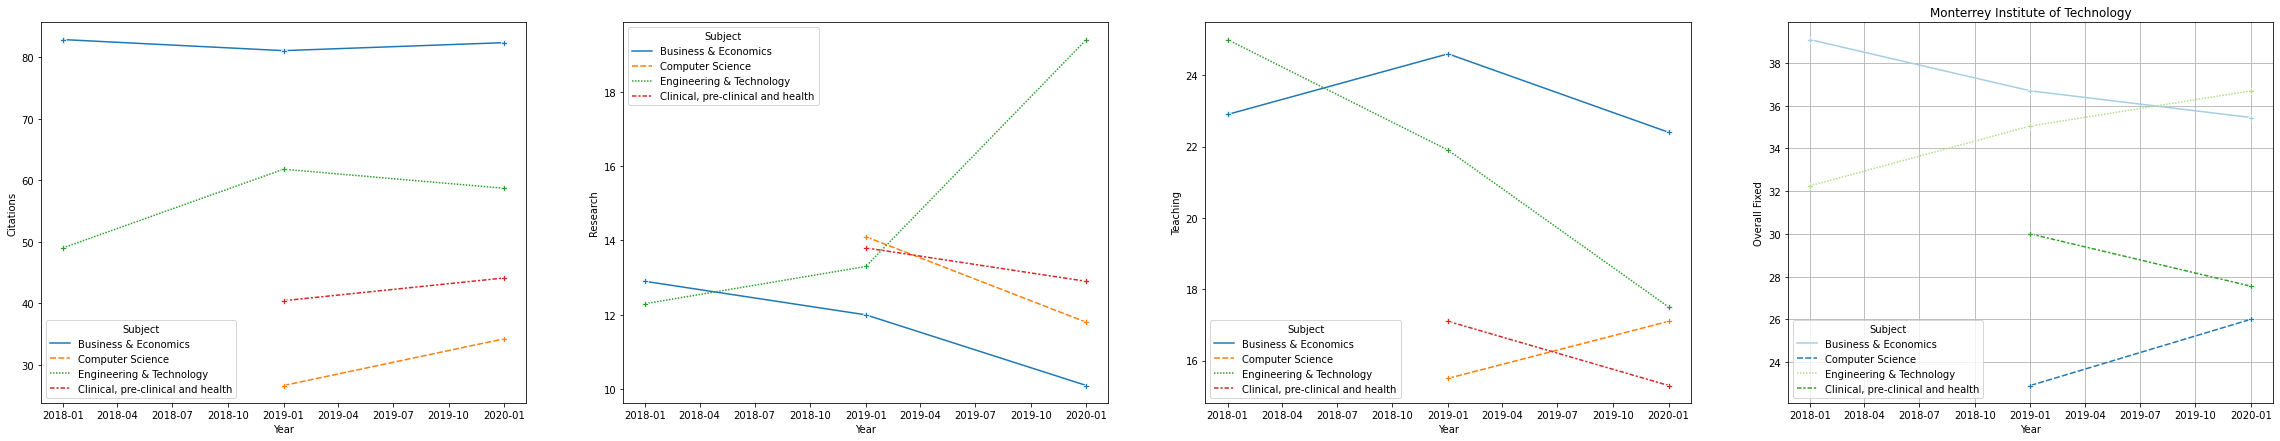

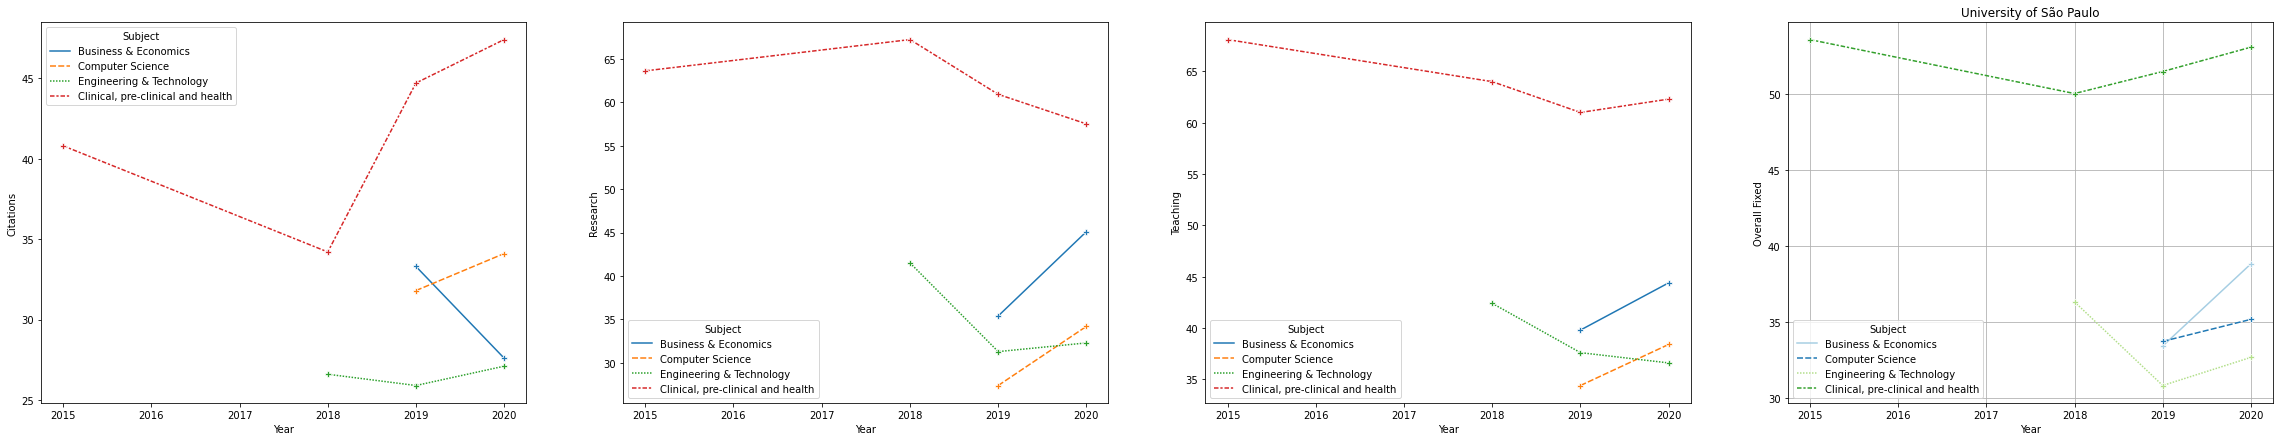

In [21]:
for i in range(len(universities)):
    uni = universities[i]
    # Creamos los datasets
    df_business = pd.read_excel(path, sheet_name='Business & Economics')
    df_computer = pd.read_excel(path, sheet_name='Computer Science')
    df_engineer = pd.read_excel(path, sheet_name='Engineering & Technology')
    df_medicine = pd.read_excel(
        path, sheet_name='Clinical, pre-clinical and heal')

    # Seleccionamos solo la universidad
    df_business = df_business[df_business['Name'] == uni]
    df_computer = df_computer[df_computer['Name'] == uni]
    df_engineer = df_engineer[df_engineer['Name'] == uni]
    df_medicine = df_medicine[df_medicine['Name'] == uni]

    # Creamos el dataset final
    df = pd.concat([df_business, df_computer, df_engineer, df_medicine])

    # Cambiamos el año a datetime
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    # Creamos la figura
    fig, ax = plt.subplots(1, 4, sharex=True, figsize=(40, 7))

    # Creamos las graficas
    plt.grid()
    sns.lineplot(x='Year', y='Citations', hue='Subject',
                 style='Subject', marker='P', linestyle='-', data=df, ax=ax[0])
    sns.lineplot(x='Year', y='Research', hue='Subject',
                 style='Subject', marker='P', linestyle='-', data=df, ax=ax[1])
    sns.lineplot(x='Year', y='Teaching', hue='Subject',
                 style='Subject', marker='P', linestyle='-', data=df, ax=ax[2])
    sns.lineplot(x='Year', y='Overall Fixed', hue='Subject', style='Subject',
                 marker='P', linestyle='-', data=df, ax=ax[3], palette='Paired')
    plt.title(uni)

    # Guardamos la imagen
    name = "../data/img/"+uni.lower().replace(' ', '_') + ".png"
    plt.savefig(name,dpi=500)
    #plt.show()
